In [2]:
import numpy as np
import cv2
from skimage.segmentation import clear_border
import matplotlib.pyplot as plt

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline
import matplotlib
from matplotlib import pyplot as plt
import os
import seaborn as sns
import sys
%matplotlib inline

In [3]:
# img = cv2.imread('C:\Users\Serena\Desktop\campione20mL.jpg',-1)
# img = cv2.imread('C:/Users/Giacomo/Documents/gitRepos/Serena/shared_nbks/IMG_0054.JPG',-1)
img = cv2.imread('C:\Users\LISA01\Documents\gitrepos\Untitled Folder\Gennaio.JPG',-1)

In [4]:
img_B,img_G,img_R = cv2.split(img)

In [5]:
img2 = cv2.merge((img_R,img_G,img_B))

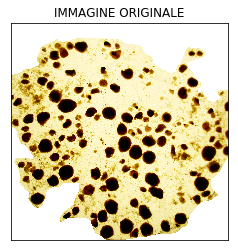

In [7]:
plt.imshow(img2), plt.grid('off'), plt.xticks([]), plt.yticks([]), plt.title('IMMAGINE ORIGINALE'); 
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Gennaio\OriginalRGB.jpg',dpi=500)

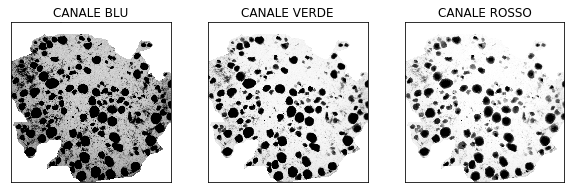

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(3,3,1),plt.imshow(img_B, cmap='gray'), plt.title('CANALE BLU'), plt.xticks([]), plt.yticks([]); 
plt.subplot(3,3,2), plt.imshow(img_G, cmap='gray'), plt.title('CANALE VERDE'), plt.xticks([]), plt.yticks([]); 
plt.subplot(3,3,3), plt.imshow(img_R, cmap='gray'), plt.title('CANALE ROSSO'), plt.xticks([]), plt.yticks([]); 
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Gennaio\channels.jpg',dpi=500)

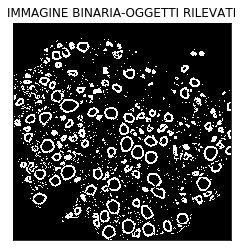

In [58]:
binImg = cv2.adaptiveThreshold(img_G, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 125,18)
plt.imshow(binImg, cmap='Greys',  interpolation='nearest'), 
plt.title('IMMAGINE BINARIA-OGGETTI RILEVATI'), plt.xticks([]), plt.yticks([]);  
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Gennaio\oggetti_rilevati.jpg',dpi=500)

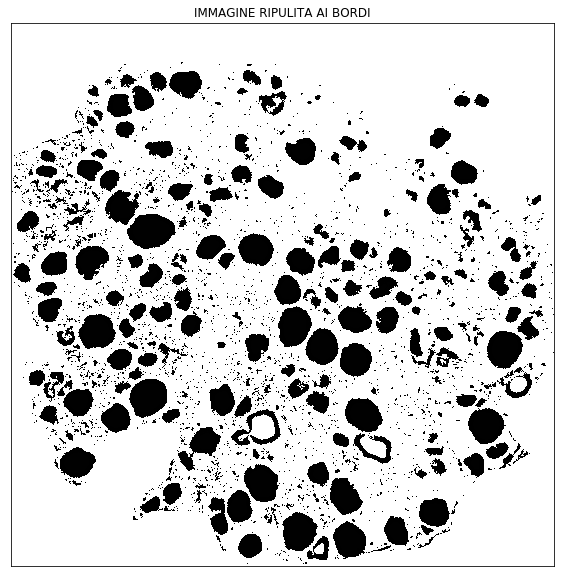

In [59]:
dst_inv = cv2.bitwise_not(binImg) 
img_clb = clear_border(dst_inv, buffer_size=5, bgval=1)
plt.figure(figsize=(10,10))
plt.imshow(img_clb, cmap='Greys',  interpolation='nearest'), plt.title('IMMAGINE RIPULITA AI BORDI'), 
plt.grid('off'), plt.xticks([]), plt.yticks([]);
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Gennaio\IMMAGINE RIPULITA AI BORDI.jpg', dpi=500)

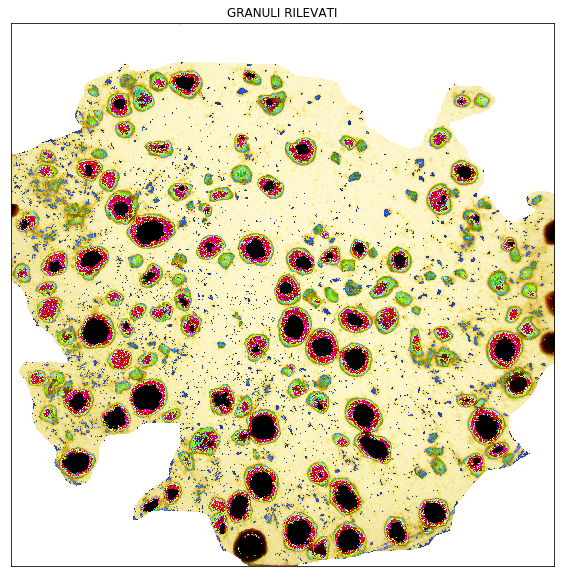

In [60]:
img_outl = cv2.merge((img_R * img_clb, img_G * img_clb, img_B * img_clb))
plt.figure(figsize=(10, 10));
plt.imshow(img_G * img_clb), plt.title('GRANULI RILEVATI'), plt.xticks([]), plt.yticks([])
plt.imshow(img_outl), plt.title('GRANULI RILEVATI'), plt.grid('off'), plt.xticks([]), plt.yticks([]);
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Gennaio\GRANULI_RILEVATI.jpg',dpi=500)

In [64]:
marker_image, props = bubble_properties_calculate(img_clb,rules={'convexity': {'min':1.9 }, 'circularity_reciprocal': {'max': 2.8, 'min': 0.2}});



{'max': 2.8, 'min': 0.2}
{'min': 1.9}


In [65]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
4,92,"(262.9347826086956, 1097.9239130434783)",117,10.823033,48.313708,1.904221,2.019031
6,100,"(272.12, 737.65)",144,11.283792,50.248737,1.990100,2.009280
7,423,"(273.5177304964539, 1533.7139479905438)",466,23.207333,96.319805,4.391620,1.745344
31,118,"(295.52542372881356, 710.3474576271186)",147,12.257335,48.870058,2.414566,1.610623
43,123,"(314.6747967479675, 698.0081300813008)",173,12.514330,61.834524,1.989180,2.473700


In [66]:
props['equivalent_diameter_mm']=props['equivalent_diameter']/49

props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal,equivalent_diameter_mm
label,,,,,,,,
4,92,"(262.9347826086956, 1097.9239130434783)",117,10.823033,48.313708,1.904221,2.019031,0.220878
6,100,"(272.12, 737.65)",144,11.283792,50.248737,1.990100,2.009280,0.230281
7,423,"(273.5177304964539, 1533.7139479905438)",466,23.207333,96.319805,4.391620,1.745344,0.473619
31,118,"(295.52542372881356, 710.3474576271186)",147,12.257335,48.870058,2.414566,1.610623,0.250150
43,123,"(314.6747967479675, 698.0081300813008)",173,12.514330,61.834524,1.989180,2.473700,0.255394


In [67]:
def classe(equivalent_diameter_mm):
    if equivalent_diameter_mm>= 5:
        return 12
    elif 4<=equivalent_diameter_mm<5:
        return 11
    elif 3.5<=equivalent_diameter_mm<4:
        return 10
    elif 3<=equivalent_diameter_mm<3.5:
        return 9
    elif 2.5<=equivalent_diameter_mm<3:
        return 8
    elif 2<=equivalent_diameter_mm<2.5:
        return 7
    elif 1.5<=equivalent_diameter_mm<2:
        return 6
    elif 1<=equivalent_diameter_mm<1.5:
        return 5
    elif 0.8<=equivalent_diameter_mm<1:
        return 4
    elif 0.5<=equivalent_diameter_mm<0.8:
        return 3
    elif 0.2<=equivalent_diameter_mm<0.5:
        return 2
    elif equivalent_diameter_mm<0.2:
        return 1
    

In [68]:
props["equivalent_diameter_mm"].apply(classe);


In [69]:
props['classe']=props["equivalent_diameter_mm"].apply(classe)
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal,equivalent_diameter_mm,classe
label,,,,,,,,,
4,92,"(262.9347826086956, 1097.9239130434783)",117,10.823033,48.313708,1.904221,2.019031,0.220878,2
6,100,"(272.12, 737.65)",144,11.283792,50.248737,1.990100,2.009280,0.230281,2
7,423,"(273.5177304964539, 1533.7139479905438)",466,23.207333,96.319805,4.391620,1.745344,0.473619,2
31,118,"(295.52542372881356, 710.3474576271186)",147,12.257335,48.870058,2.414566,1.610623,0.250150,2
43,123,"(314.6747967479675, 698.0081300813008)",173,12.514330,61.834524,1.989180,2.473700,0.255394,2


In [70]:
classi=props["equivalent_diameter_mm"].apply(classe)


In [71]:
[1 for i in classi if i==1]
print('classe 1')
len( [1 for i in classi if i==1])

classe 1


56

In [72]:
[2 for i in classi if i==2] 
print('classe 2')
len([2 for i in classi if i==2]  )

classe 2


286

In [73]:
[3 for i in classi if i==3] 
print('classe 3')
len([3 for i in classi if i==3] )

classe 3


20

In [74]:
[4 for i in classi if i==4]
print('classe 4')
len([4 for i in classi if i==4])

classe 4


1

In [75]:
[5 for i in classi if i==5]
print('classe 5')
len([5 for i in classi if i==5])


classe 5


9

In [76]:
[6 for i in classi if i==6]
print('classe 6')
len([6 for i in classi if i==6])

classe 6


14

In [77]:
[7 for i in classi if i==7]
print('classe 7')
len([7 for i in classi if i==7])

classe 7


15

In [78]:
[8 for i in classi if i==8]
print('classe 8')
len([8 for i in classi if i==8])

classe 8


14

In [79]:
[9 for i in classi if i==9]
print('classe 9')
len([9 for i in classi if i==9])

classe 9


8

In [80]:
[10 for i in classi if i==10]
print('classe 10')
len([10 for i in classi if i==10])

classe 10


9

In [81]:
[11 for i in classi if i==11]
print('classe 11')
len([11 for i in classi if i==11])

classe 11


14

In [82]:
[12 for i in classi if i==12]
print('classe 12')
len([12 for i in classi if i==12])

classe 12


1

In [83]:
len(classi)

447

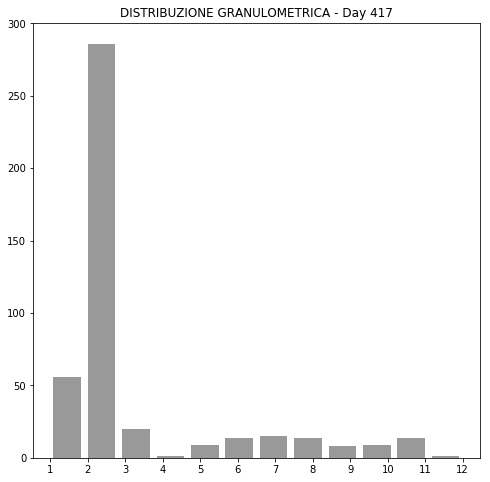

In [84]:
fig = plt.figure(figsize=(8,8));
plt.xticks([k for k in range(0,15)]);
classi.hist(bins=12, rwidth=0.8, color='GREY', align='mid', alpha=0.8); #rwidth =spessore barra #non riesco a mettere il numero al centro della barra

plt.grid('off'),plt.title('DISTRIBUZIONE GRANULOMETRICA - Day 417')
#plt.xlabel('Classi granulometriche')
#plt.ylabel('Frequenza')
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Gennaio\Gennaio.PNG',dpi=500)

In [32]:
#fig = plt.figure(figsize=(10,10))
#sns.pairplot(props)#prendi solo l'immagine che ti interessa...l'ultima



In [33]:
#ax = plt.subplot(111) # crei un'area di plotting
#ax.set_xticks(range(10)) # l'asse x va da 0 a 10
#ax.set_yticks(range(10)) #l'asse y va da 0 a 10


In [34]:
rect = [props.centroid] 
rect


[label
 1       (18.640243902439025, 1655.3170731707316)
 5       (52.079105473965285, 1359.3898531375166)
 20       (102.98076720966894, 1516.459485023647)
 21         (67.70540265035677, 970.697247706422)
 65        (111.5596590909091, 866.9318181818181)
 87        (252.3369933577335, 2081.645994306629)
 91      (259.21277187130846, 1040.0856785490932)
 92        (295.5832349468713, 2272.720705430933)
 95         (291.09057048562, 1453.5151815181518)
 102     (255.00980392156862, 1225.7745098039215)
 142       (322.5694117647059, 669.8070588235294)
 149     (344.87539936102235, 2421.0843982960596)
 171       (404.2936112979153, 720.5577673167451)
 174       (446.9877117855148, 855.8955501768758)
 195        (387.8876404494382, 610.314606741573)
 205      (397.7669902912621, 1588.8640776699028)
 219       (455.1821656050955, 540.4124840764331)
 221      (445.4296698326549, 1962.5938489371324)
 224      (482.0573282855598, 1274.4392335625434)
 250     (457.06113537117903, 1120.22270742

In [35]:
rect=[49.7609561753, 1916.57768924]
#plt.plot([1,2,3]);
#plt.axis([-1.1, 1.1, -1.1, 1.1]) ;
# plt.xticks([0.25*k for k in range(-4,5)]) ;
#plt.yticks([-0.9, -0.4, 0.0, 0.3, 0.6, 0.85],['A','B','C','D','E','F']);
#plt.title('The cubic function in [-1,1]')
#plt.xlabel('my x-axis label')
#plt.ylabel('my y-axis label')
#plt.grid()
#x=1,2,3
#y=3,2,4
#plt.plot(x,y,'g:o');

In [36]:
#x=185.968253968,407.153994845
#y=#.55026455,385.184439433
#plt.plot(x,y,'g:o');